In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import signal

from KT_model import *
from SpecRep import SRM, getSww_from_a_model

In this file, I'll learn how to obtain the EPSD from a real earthquake acceleratioin recording by STFT

In [2]:
# import the El centro signal

col_names_NS = ['time', 'NS']

df_NS = pd.read_table('/Users/leslie/Google Drive/Paper Paper Paper/proposed_papers_PhD_UoL/By topic/[Project] Missing data imputation in incomlete ground motion/Time domain method/Playtoy_data/El centro earthquake data/elcentro_NS.dat', 
                   delimiter=' ', names=col_names_NS)

In [3]:
# df_NS

In [4]:
t_axis = df_NS['time']
amp_axis = df_NS['NS']

In [5]:
FS = int(1 / (t_axis[3] - t_axis[2]))
FS

50

In [6]:
len(amp_axis)

2688

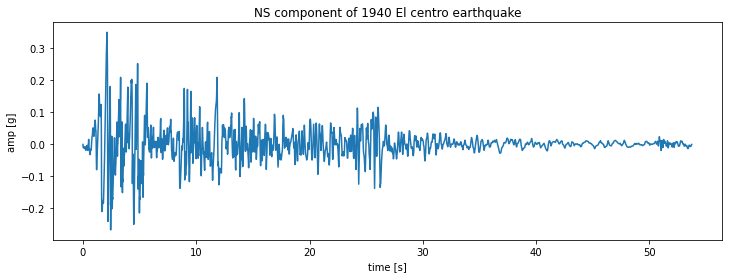

In [7]:
plt.figure(figsize=(12, 4))
plt.plot(t_axis, amp_axis)
plt.title('NS component of 1940 El centro earthquake')
plt.xlabel('time [s]')
plt.ylabel('amp [g]')
plt.show()

#### Using `signal.stft`

In [ ]:
f, t, Zxx = signal.stft(amp_axis, FS, nperseg=128)

In [ ]:
f.shape

In [ ]:
t.shape

In [ ]:
Zxx.shape

Number of frequency bins = $\frac{framesize}{2}+1$.

Ergo, apparantly, the long the 'framesize', i.e. `nperseg`, the more frequency bins, the higher the frequency resolution;

In [ ]:
128/2+1

Number of frames = $\frac{samples - framesize}{hopsize}+1$

In [ ]:
(len(amp_axis)-128)/64 + 1

In [ ]:
# t

In [ ]:
# t_axis

Hint: so the the new time resolution is: `dt` = 1.28s

In [ ]:
# as a comparison, see the t_axis of the original signal, dt=0.02s

In [ ]:
f, t, Zxx = signal.stft(amp_axis, FS, nperseg = 256)

In [ ]:
Zxx.shape

In [ ]:
plt.pcolormesh(t, f, np.abs(Zxx), cmap='viridis', shading='gouraud')
plt.title('STFT Magnitude')
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [sec]')
plt.show()

In [ ]:
t

### Using `plt.specgram`

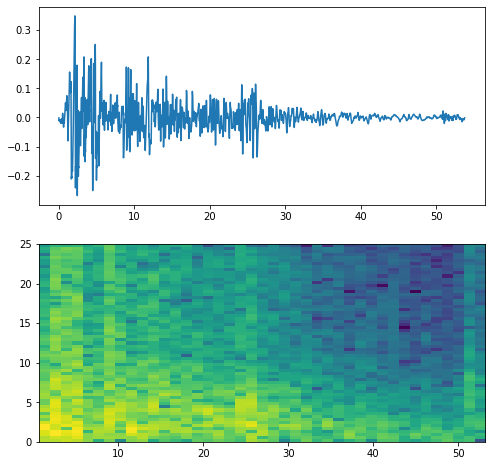

In [8]:
fig, (ax1, ax2) = plt.subplots(nrows=2, figsize=(8, 8))
ax1.plot(t_axis, amp_axis)
Pxx, freqs, t_bins, im = ax2.specgram(amp_axis, 
                                      NFFT =128,
                                      Fs=FS, 
                                      noverlap=64,
                                      mode='magnitude')
plt.show()

In [9]:
Pxx.shape

(65, 41)

In [10]:
t_bins.shape

(41,)

In [11]:
freqs

array([ 0.      ,  0.390625,  0.78125 ,  1.171875,  1.5625  ,  1.953125,
        2.34375 ,  2.734375,  3.125   ,  3.515625,  3.90625 ,  4.296875,
        4.6875  ,  5.078125,  5.46875 ,  5.859375,  6.25    ,  6.640625,
        7.03125 ,  7.421875,  7.8125  ,  8.203125,  8.59375 ,  8.984375,
        9.375   ,  9.765625, 10.15625 , 10.546875, 10.9375  , 11.328125,
       11.71875 , 12.109375, 12.5     , 12.890625, 13.28125 , 13.671875,
       14.0625  , 14.453125, 14.84375 , 15.234375, 15.625   , 16.015625,
       16.40625 , 16.796875, 17.1875  , 17.578125, 17.96875 , 18.359375,
       18.75    , 19.140625, 19.53125 , 19.921875, 20.3125  , 20.703125,
       21.09375 , 21.484375, 21.875   , 22.265625, 22.65625 , 23.046875,
       23.4375  , 23.828125, 24.21875 , 24.609375, 25.      ])

In [ ]:
t_bins

In [ ]:
# grid_x, grid_y = np.meshgrid(from_esti_instance.t_axis_4simu, from_esti_instance.w_axis_4simu)

In [ ]:
# from scipy.interpolate import griddata
# grid_z0 = griddata(points, values, (grid_x, grid_y), method='nearest')

In [ ]:
# fig = plt.figure()
# ax1 = fig.add_subplot(111)
# ax1.scatter(t_bins, freqs)
# plt.show()

In [ ]:
# t_axis

> Since we already have the STFT, we try the **SRM**

*let's try directly do simulation based on the estimated spectra*

In [12]:
from_esti_instance = SRM(wu=25 * 2 * np.pi, 
                         N1=1024, 
                         fs=50, 
                         duration=50)

In [13]:
# Take a look at the shape
print("the shape of the w axis:", from_esti_instance.w_axis_4simu.shape)
print("the shape of the time axis:", from_esti_instance.t_axis_4simu.shape)

the shape of the w axis: (1024,)
the shape of the time axis: (2500,)


In [ ]:

# we already got the estimated spectra, ie. Pxx

the lower limit of sampling frequency: 50
the length of the simulation (2500,)


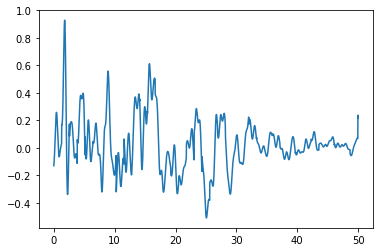

In [23]:
# try method3
a_simulation = from_esti_instance.SpecRepsentation3(Pxx, t_bins=t_bins, plot='y')

In [14]:
# a_simulation = from_esti_instance.SpecRepsentation2(Pxx, t_bins=t_bins, freqs=freqs, plot='y')

In [ ]:
# # before interpolation
# from scipy import interpolate
# plt.figure(figsize=(12, 4))

# # before
# plt.plot(t_bins, Pxx[1], 'bx')

# f = interpolate.interp1d(t_bins, Pxx[1], kind='next', bounds_error=False, fill_value='extrapolate')

# # the new t is conveniently the `t_axis`
# P_new = f(t_axis)
# plt.plot(t_axis, P_new, 'r-')



# plt.xlabel('frequency axis')
# plt.show()

In [ ]:
freqs.shape

In [ ]:
from matplotlib import mlab

def specgram3d(y, fs=200, title=None):
        ax = plt.axes(projection='3d')
        ax.set_title(title, loc='center', wrap=True)
        spec, freqs, t = mlab.specgram(y, Fs=fs, NFFT=256, noverlap=128)
        X, Y, Z = t[None, :], freqs[:, None], spec
        ax.plot_wireframe(X, Y, Z, color='black', alpha=0.5)
        ax.set_xlabel('time (s)')
        ax.set_ylabel('frequencies (Hz)')
        ax.set_zlabel('PSD')
#         ax.set_zlim([0, 0.015])
#         ax.set_ylim([0, 10])
#         ax.set_xlim([0, 14])
#         ax.view_init(20, 220)
        ax.invert_xaxis()
#         ax.invert_yaxis()
        return X, Y, Z

In [ ]:
fig2, ax3 = plt.subplots(subplot_kw={'projection': '3d'}, figsize=(14, 14))
specgram3d(amp_axis, fs=50)

plt.show()